In [14]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
from sklearn.metrics import accuracy_score, log_loss
from sklearn.datasets import make_blobs, make_circles
from tqdm import tqdm

In [15]:
def initialization(n0, n1, n2):
    
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1,1)
    W2 = np.random.randn(n2, n1) 
    b2 = np.random.randn(n2,1)

    parameters = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2,
    }

    return parameters

In [16]:
def forward_propagation(X, parameters):

    Z1 = parameters['W1'].dot(X) + parameters['b1']
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = parameters['W2'].dot(A1) + parameters['b2']
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1' : A1,
        'A2' : A2
    }
    
    return activations

In [17]:
def back_propagation(X, y, activations, parameters):

    W2 = parameters['W2']
    A1 = activations['A1']
    A2 = activations['A2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True) # To make sure b2 and db2 same dimension

    dZ1 = (W2.T).dot(dZ2) * A1 * (1-A1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True) # To make sure b1 and db1 same dimension

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

In [18]:
def update(gradients, parameters, learning_rate):

    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    dW1 = gradients['dW1']
    dW2 = gradients['dW2']
    db1 = gradients['db1']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2,
    }

    return parameters

In [19]:
def predict(X, parameters): 
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    return A2 >= 0.5

In [ ]:
def neural_network(X_train, y_train,X_test, y_test, n1, learning_rate=0.1, n_iter=1000):

    # Initilization W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parameters = initialization(n0, n1, n2)
    
    Loss = []
    Loss_test = []
    Accuracy = []
    Accuracy_test = []

    
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parameters)

        if(i % 10 == 0):
            Loss.append(log_loss(y_train.flatten(), activations['A2'].flatten()))
            y_pred = predict(X_train, parameters)
            Accuracy.append(accuracy_score(y_pred.flatten(), y_train.flatten()))
            
            # Test set
            activations2 = forward_propagation(X_test, parameters)
            Loss_test.append(log_loss(y_test.flatten(), activations2['A2'].flatten()))
            y_pred_test = predict(X_test, parameters)
            Accuracy_test.append(accuracy_score(y_pred_test.flatten(), y_test.flatten()))
            

        gradients = back_propagation(X_train, y_train, activations, parameters)
        parameters = update(gradients, parameters, learning_rate)
        
    '''
    
    # Meshgrid
    x=np.linspace(-1.5,1.5,100)
    y=np.linspace(-1.5,1.5,100)
    xx, yy = np.meshgrid(x, y)
    
    grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
    grid = np.transpose(grid)

    activations = forward_propagation(grid, parameters)
    Z = activations['A2']
    Z = np.squeeze(Z)
    Z = Z.reshape(xx.shape)
    '''


    # Plot
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.plot(Loss, label="Train Loss")
    plt.plot(Loss_test,label="Test Loss")
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(Accuracy, label="Train Accuracy")
    plt.plot(Accuracy_test, label="Test Accuracy")
    plt.legend()

    '''
    plt.subplot(1,3,3)
    plt.contour(xx,yy, Z, levels=[0.5], colors="k", linewidths=2)
    plt.scatter(X_train[0, :], X_train[1, :], c=y_train, cmap='cool')
    '''

    plt.tight_layout()
    plt.show()
    
    return parameters

X dimensions :  (2, 100)
y dimensions :  (1, 100)


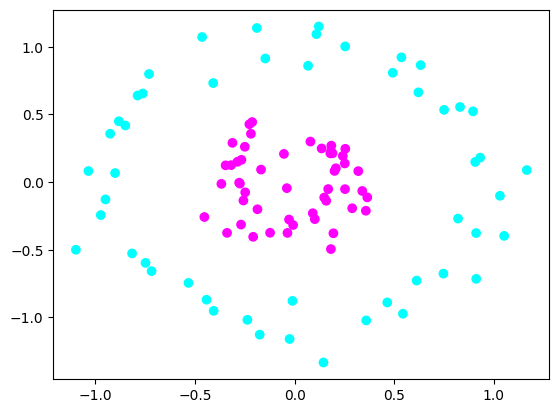

In [10]:
# Learning decision boundary of set of points

X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print("X dimensions : ", X.shape)
print("y dimensions : ", y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='cool')
plt.show()

100%|██████████| 3000/3000 [00:00<00:00, 4368.88it/s]


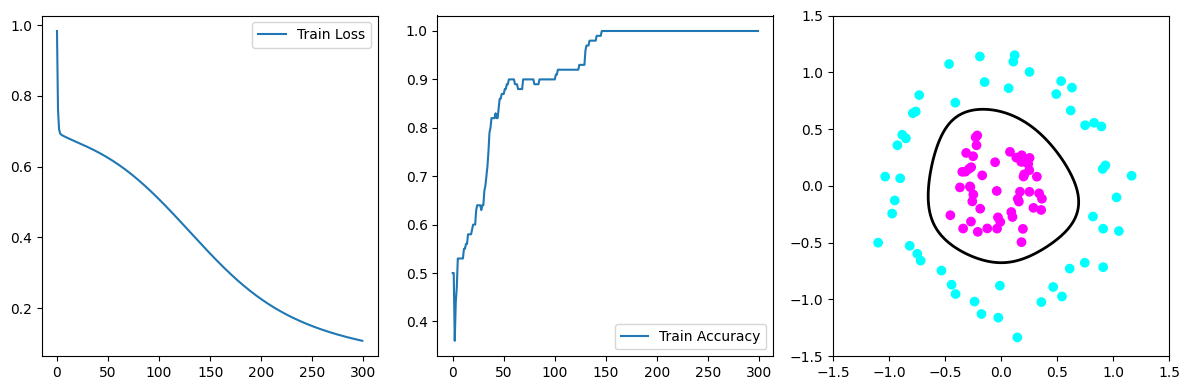

In [11]:
parameters = neural_network(X, y, n1=8, n_iter=3000, learning_rate=0.1)

In [22]:
# Cat and dog classification

X_train, y_train, X_test, y_test = load_data()
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)


X_train shape :  (1000, 64, 64)
X_test shape :  (200, 64, 64)


In [23]:
def preprocess(dataset):
    new = np.zeros((dataset.shape[0], dataset[0].flatten().shape[0]), dtype=float)
    for i in range(len(dataset)):
        new[i] = dataset[i].flatten()
        new[i] = new[i]/250.0
    return new

In [24]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)
X_train = X_train.T
X_test = X_test.T

y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

print(X_train.shape)
print(y_train.shape)

(4096, 1000)
(1, 1000)


100%|██████████| 5000/5000 [01:40<00:00, 49.85it/s]


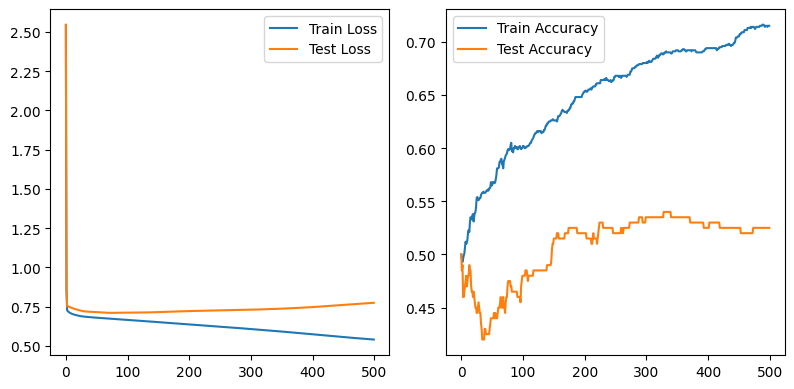

In [34]:
parameters = neural_network(X_train, y_train, X_test, y_test, n1=16, learning_rate=0.1, n_iter=5000)